In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import codecs

In [3]:
test_csv_path2 = '../Data/YelpChi/output_review_yelpResData_NRYRcleaned.txt'
df_yelpchi2 = pd.read_csv(test_csv_path2, sep='delimiter', header=None)

In [5]:
print(df_yelpchi2.tail(10))

                                                       0
61531  I went to a party at this bar & grill yesterda...
61532  I love me some Cafezazzo! I come here a few ti...
61533  So after all these years I decided to check ou...
61534  I truly love this place! Just like everyone st...
61535  If you want seafood this is place to go. It is...
61536  I've passed this place a bunch of times on my ...
61537  Rubino's is not really setup as a retail opera...
61538  This place is amazing. The food is great and y...
61539  OK went back the next day as I was driving by ...
61540  Delicious, rather authentic Mexican food, must...


In [6]:
sample = df_yelpchi2[0]

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
swords = set(stopwords.words("english"))
stemmer = PorterStemmer()

def parse_text(review):
    clean_review = []
    # text = re.sub("[^a-zA-Z]", ' ', text)
    # text = text.lower().split()
    # text = [w for w in text if w not in swords]
    
    # # Stemming
    # stems = [stemmer.stem(ss) for ss in text]
    for text in review:
        text = re.sub("[^a-zA-Z]", ' ', text)
        text = text.lower().split()
        text = [w for w in text if w not in swords]
        
        # Stemming
        # stems = [stemmer.stem(ss) for ss in text]
        text = " ".join(text)
        clean_review.append(text)
    
    return clean_review

sample = parse_text(sample)

In [9]:
df_clean_big = pd.DataFrame(sample,columns = ['text'])
print(df_clean_big['text'].tail(20))

61521                 man place good even matter get chips
61522    ok get ready totally biased review give el mil...
61523    quite possibly favorite mexican food chicago o...
61524    give place star damn good food damn good price...
61525    lately everything tried menu quite good partic...
61526    problem face every time certain friends visit ...
61527    like san luis speciality alambres kind mexican...
61528    hmmmm ok much white sox land cobblestones gets...
61529    came pm pm start drink alone studying one look...
61530    surprised eagerly roped pop trivia game upon w...
61531    went party bar grill yesterday pleasant surpri...
61532    love cafezazzo come times around year kids som...
61533    years decided check cafezazzo neighborhood gla...
61534    truly love place like everyone states reviews ...
61535    want seafood place go warehouse man help nice ...
61536    passed place bunch times way olympic northwest...
61537    rubino really setup retail operation prices in.

In [11]:
### MENGINPUT METADATA

df_meta2 = pd.read_csv("../Data/YelpChi/output_meta_yelpResData_NRYRcleaned.txt", sep=' ', header=None
    , names=['date','review_id','reviewer_id','product_id','label','useful_count','funny_count','cool_count'
    ,'star_rating'])
print(df_meta2.shape)

df_meta2['label'] = df_meta2['label'].replace({'N': 0, 'Y': 1})
df_meta2
# df_meta['label'] = df_meta['label'].replace({'N': 0, 'Y': 1})


(61541, 9)


,date,review_id,reviewer_id,product_id,label,useful_count,funny_count,cool_count,star_rating
0,9/22/2012,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,pbEiXam9YJL3neCYHGwLUA,0,0,0,0,5
1,9/22/2012,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,pbEiXam9YJL3neCYHGwLUA,0,0,0,0,5
2,9/19/2012,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,pbEiXam9YJL3neCYHGwLUA,0,0,0,2,3
3,9/6/2012,iSN,DlwexC7z88ymAzu45skODw,pbEiXam9YJL3neCYHGwLUA,0,3,0,8,3
4,9/9/2012,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,pbEiXam9YJL3neCYHGwLUA,0,0,2,1,5
...,...,...,...,...,...,...,...,...,...
61536,4/7/2012,I6pazvTPUqRtU,fUXNHG4x1AN9oPpBSpCtUw,_KI0Y2UO68kJuTFUKucaXQ,0,1,0,0,5
61537,6/5/2009,gu7FbL,QQCm2oqSnnz24Z-yHeMtxQ,_KI0Y2UO68kJuTFUKucaXQ,0,0,1,1,4
61538,5/6/2012,hLwn6zw,OXRKydSyzC35n2fNUnbopg,XvP-kanjF6SpchosRk0N5g,0,0,0,0,5
61539,1/8/2011,KEkOzeO9YJ,NE8ULc362aFvnkTDgvZbcA,XvP-kanjF6SpchosRk0N5g,0,0,1,2,2


In [12]:
import tensorflow
from tensorflow.keras.utils import to_categorical
from keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Activation, Dropout, LSTM, Flatten, Input, concatenate
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, BatchNormalization

from sklearn.model_selection import train_test_split


0    53400
1     8141
Name: label, dtype: int64

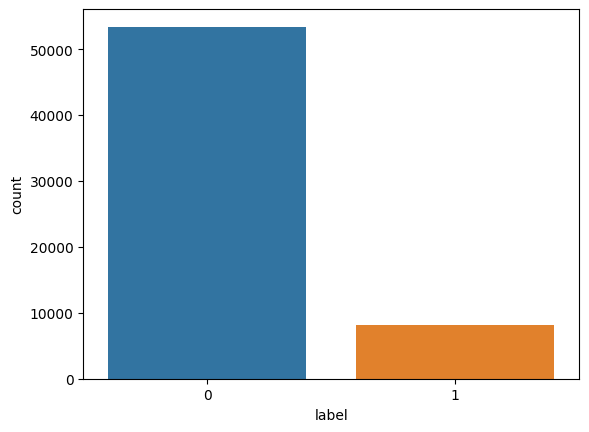

In [13]:
#variable of genuine (o) or fake (1)
sns.countplot(x='label', data=df_meta2)
df_meta2['label'].value_counts()
# df_label_merged.tail(10)

In [14]:
### PRE-PROCESS TAHAP 3-TOKENISASI
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras. preprocessing.sequence import pad_sequences
review_text_ori= df_clean_big['text'].to_list()
tokenizer_dict = {}
tokenizer_dict['ori'] = Tokenizer()
tokenizer_dict['ori'].fit_on_texts(review_text_ori)

In [15]:
encode_text_ori = tokenizer_dict['ori'].texts_to_sequences(review_text_ori)

In [16]:
print(df_clean_big['text'][1])
print(encode_text_ori[1])

probably one best meals ever performance food grant achatz prepare dessert amazing getting tour kitchen prep areas downstairs personally even better prepared evening come prepared sit least hours one word describe awesome
[138, 6, 17, 555, 68, 4064, 1, 2280, 2213, 1759, 107, 45, 246, 1635, 386, 4854, 2656, 1841, 1129, 28, 56, 421, 338, 63, 421, 268, 219, 306, 6, 811, 1283, 109]


In [19]:
# # Near-Miss Under Sampling
# nmiss = RandomOverSampler(random_state=42)
# under_text, under_label = nmiss.fit_resample(X_review_tfidf,df_meta['label'])

In [17]:
genuine_fake_ori = to_categorical(df_meta2['label'])
# genuine_fake2 = df_meta2['label']
# genuine_fake = pd.concat([genuine_fake1,genuine_fake2],axis= 0)
print(genuine_fake_ori)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [19]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(encode_text_ori,genuine_fake_ori, random_state=0, test_size=0.10, stratify=genuine_fake_ori)
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train3,y_train3, random_state=0, test_size=0.10)

In [20]:
vocab_ori = len(tokenizer_dict['ori'].index_word)+1
max_kata = 131
X_train3 = pad_sequences(X_train3, maxlen=max_kata, padding='post' )
X_test3 = pad_sequences(X_test3, maxlen=max_kata, padding='post' )
X_val3 = pad_sequences(X_val3, maxlen=max_kata, padding='post' )

In [21]:
print(vocab_ori)

56905


In [22]:
print(X_train3.shape,X_test3.shape,y_train3.shape,y_test3.shape)

(49847, 131) (6155, 131) (49847, 2) (6155, 2)


In [23]:
from gensim.models import KeyedVectors

In [25]:
word2vec = KeyedVectors.load_word2vec_format("../Data/GoogleNews-vectors-negative300.bin", binary=True)

In [27]:
# # Testing Some Simliarities 
# w2 = 'love'
# word2vec.most_similar_cosmul(positive=w2)

In [26]:
# Word Embedding
def make_embedding(unique_word,text):
    embedding_dim = 300
    matrix = np.zeros((unique_word+1, embedding_dim)) 
    for word, i in text:
        if word in word2vec.index_to_key:
            matrix[i] = word2vec[word]
    
    print('Null word embeddings: %d' % np.sum(np.sum(matrix, axis=1) == 0))
    return matrix

# embedding_matrix_few = make_embedding(vocab_few,tokenizer_dict['few'].word_index.items())
# embedding_matrix_many = make_embedding(vocab_many,tokenizer_dict['many'].word_index.items())
embedding_matrix_ori = make_embedding(vocab_ori,tokenizer_dict['ori'].word_index.items())

Null word embeddings: 18073


In [27]:
from senticnet4 import senticnet4

senticnet = senticnet4.senticnet
#mengambil hanya nilai polaritinya saja
for key in senticnet:
    senticnet[key] = senticnet[key][:4]

In [31]:
# lexicon_matrix = np.zeros((vocab+1, 4))

# for word, i in token.word_index.items():      
#     if word in senticnet:
#         lexicon_matrix[i] = senticnet.get(word)
        
# print('Null word embeddings: %d' % np.sum(np.sum(lexicon_matrix, axis=1) == 0))

In [28]:
def make_lex_embedding(unique_word,text):
    embedding_dim = 4
    matrix = np.zeros((unique_word+1, embedding_dim)) 
    for word, i in text:
        if word in senticnet:
            matrix[i] = senticnet.get(word)
    
    print('Null word embeddings: %d' % np.sum(np.sum(matrix, axis=1) == 0))
    return matrix


# lexicon_matrix_few = make_lex_embedding(vocab_few,tokenizer_dict['few'].word_index.items())
# lexicon_matrix_many = make_lex_embedding(vocab_many,tokenizer_dict['many'].word_index.items())
lexicon_matrix_ori = make_lex_embedding(vocab_ori,tokenizer_dict['ori'].word_index.items())

Null word embeddings: 45140


In [35]:
dfae = pd.DataFrame(lexicon_matrix)
dfae.head(30)

,0,1,2,3
0,0.000,0.000,0.000,0.000
1,-0.070,0.000,0.009,-0.120
2,0.000,-0.070,0.000,0.000
3,0.905,0.773,0.000,0.892
4,0.053,0.127,-0.080,0.134
5,0.000,0.000,0.000,0.000
6,0.147,0.126,-0.090,0.314
7,0.000,0.000,0.000,0.000
8,0.000,0.000,0.000,0.000
9,-0.610,0.000,0.856,-0.820


In [36]:
print(embedding_matrix.shape)
print(lexicon_matrix.shape)

(10238, 300)
(10238, 4)


In [29]:
#naive concatenation, mengkonkat kedua feature tanpa prerlakuan khusus
def naive_concatenation(word2vec_features, lexicon_features):
    return np.concatenate((word2vec_features, lexicon_features), axis=1)

# concatenated_few = naive_concatenation(embedding_matrix_few,lexicon_matrix_few)
# concatenated_many = naive_concatenation(embedding_matrix_many,lexicon_matrix_many)
concatenated_ori = naive_concatenation(embedding_matrix_ori,lexicon_matrix_ori)

In [30]:
#multichannel dimana feature dengan dimensi terkecil(lexicon) akan mempadding dirinya agar bisa seimbang dalam pemisahan di channel model
def concatenate_features(x, x_lex):
    w2vdim = x.shape[1]
    lexdim = x_lex.shape[1]
    npad = ((0, 0), (0, w2vdim - lexdim))

    x_lex_padded = np.pad(x_lex, pad_width=npad, mode='constant', constant_values=0)
    x_fat = np.concatenate((x[..., np.newaxis], x_lex_padded[..., np.newaxis]), axis=2)

    return x_lex_padded

# multichannel_few = concatenate_features(embedding_matrix_few,lexicon_matrix_few)
# multichannel_many = concatenate_features(embedding_matrix_many,lexicon_matrix_many)
multichannel_ori = concatenate_features(embedding_matrix_ori,lexicon_matrix_ori)

#seleksi fitur word embedding glove
embedding_dictionary = dict()
#glove_file = open('C:\Users\Sayang\Documents\code skripsi\dataTemp\Glove.6B.100d.txt', encoding='utf8')
glove_file = open('C:\glove.6B.100d.txt', encoding='utf8')

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embedding_dictionary [word] = vector_dimensions
glove_file.close()

from numpy import zeros

embedding_matrix = zeros((vocab, 100))
for word, index in token.word_index.items(): #index_word
    embedding_vector = embedding_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def generate_model_report(y_actual,y_prediction):
    akurasi = accuracy_score(y_actual,y_prediction)
    recall = recall_score(y_actual,y_prediction)
    presisi = precision_score(y_actual,y_prediction)
    f1 = f1_score(y_actual,y_prediction)
    auc = roc_auc_score(y_actual,y_prediction)
    # print("Akurasi : ", akurasi)
    # print("Recall : ", recall)
    # print("Presisi : ", presisi)
    # print("F1-Score : ",f1)
    return akurasi, recall, presisi, f1, auc

In [32]:
def cnn_base(embedding_layer,output_dim,input_dim):
    input_word = Input(shape=(max_kata,))
    embed_word = Embedding(input_dim= input_dim, output_dim=output_dim, weights=embedding_layer, input_length=max_kata, trainable = False)(input_word)
    # define the convolution layer
    # concatenated = concatenate([embed_word, embed_lex], axis=-1)
    x = Conv1D(64, kernel_size=3, activation='relu')(embed_word)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(128, kernel_size=3, activation='relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.5)(x)
    # flatten the output
    x = GlobalMaxPooling1D()(x)
    # define the output layer
    output_tensor = Dense(2, activation='sigmoid')(x)
    model = Model(input_word, outputs=output_tensor)
    model.compile(optimizer='adam',  loss="binary_crossentropy", metrics=['accuracy'])
    return model

model_base = cnn_base(None,300,vocab_ori)
model_base.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 131)]             0         
                                                                 
 embedding (Embedding)       (None, 131, 300)          17071500  
                                                                 
 conv1d (Conv1D)             (None, 129, 64)           57664     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 64, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 62, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 31, 128)          0         
 1D)                                                         

In [34]:
# model_base.compile(optimizer='adam',  loss="binary_crossentropy", metrics=['accuracy'])
history_base = model_base.fit(X_train3, y_train3, epochs=10,batch_size=16, validation_data=(X_val3,y_val3))

Epoch 1/10
3116/3116 [==============================] - 217s 67ms/step - loss: 0.3752 - accuracy: 0.8671 - val_loss: 0.3907 - val_accuracy: 0.8709
Epoch 2/10
3116/3116 [==============================] - 209s 67ms/step - loss: 0.3633 - accuracy: 0.8674 - val_loss: 0.4104 - val_accuracy: 0.8707
Epoch 3/10
3116/3116 [==============================] - 205s 66ms/step - loss: 0.3484 - accuracy: 0.8672 - val_loss: 0.3932 - val_accuracy: 0.8706
Epoch 4/10
3116/3116 [==============================] - 214s 69ms/step - loss: 0.3227 - accuracy: 0.8708 - val_loss: 0.3913 - val_accuracy: 0.8621
Epoch 5/10
3116/3116 [==============================] - 212s 68ms/step - loss: 0.2811 - accuracy: 0.8857 - val_loss: 0.4104 - val_accuracy: 0.8469
Epoch 6/10
3116/3116 [==============================] - 211s 68ms/step - loss: 0.2279 - accuracy: 0.9070 - val_loss: 0.4317 - val_accuracy: 0.8303
Epoch 7/10
3116/3116 [==============================] - 214s 69ms/step - loss: 0.1735 - accuracy: 0.9312 - val_loss: 0

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

eval_base = model_base.evaluate(X_test3, y_test3)
y_pred=model_base.predict(X_test3)
y_pred=np.argmax(y_pred,axis=1)
y_testnp=np.argmax(y_test3,axis=1)
cm1 =confusion_matrix(y_testnp,y_pred)
acc_base, recall_base, preisi_base, f1_base, auc_base = generate_model_report(y_testnp,y_pred)

193/193 [==============================] - 10s 43ms/step


In [36]:
print(acc_base, recall_base, preisi_base, f1_base, auc_base)

0.8136474411047928 0.16584766584766586 0.22388059701492538 0.1905434015525759 0.5391118127029005


In [40]:
model_naive_c = cnn_base([concatenated_ori],concatenated_ori.shape[1],vocab_ori+1)
model_naive_c.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 300, 304)          18322688  
                                                                 
 conv1d_2 (Conv1D)           (None, 298, 64)           58432     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 149, 64)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 147, 128)          24704     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 73, 128)          0         
 1D)                                                       

In [41]:
history_naive = model_naive_c.fit(X_train3, y_train3, epochs=10,batch_size=64, validation_data=(X_test3,y_test3))

Epoch 1/10
948/948 [==============================] - 313s 329ms/step - loss: 0.3692 - accuracy: 0.8668 - val_loss: 0.3843 - val_accuracy: 0.8680
Epoch 2/10
948/948 [==============================] - 310s 327ms/step - loss: 0.3567 - accuracy: 0.8670 - val_loss: 0.4061 - val_accuracy: 0.8685
Epoch 3/10
948/948 [==============================] - 308s 325ms/step - loss: 0.3487 - accuracy: 0.8680 - val_loss: 0.3753 - val_accuracy: 0.8684
Epoch 4/10
948/948 [==============================] - 305s 322ms/step - loss: 0.3365 - accuracy: 0.8698 - val_loss: 0.3781 - val_accuracy: 0.8678
Epoch 5/10
948/948 [==============================] - 304s 321ms/step - loss: 0.3209 - accuracy: 0.8735 - val_loss: 0.4070 - val_accuracy: 0.8558
Epoch 6/10
948/948 [==============================] - 304s 321ms/step - loss: 0.2978 - accuracy: 0.8797 - val_loss: 0.4000 - val_accuracy: 0.8519
Epoch 7/10
948/948 [==============================] - 306s 323ms/step - loss: 0.2715 - accuracy: 0.8887 - val_loss: 0.3787 -

In [42]:
eval_naive = model_naive_c.evaluate(X_test3, y_test3)
y_pred=model_naive_c.predict(X_test3)
y_pred=np.argmax(y_pred,axis=1)
y_testnp=np.argmax(y_test3,axis=1)
cm2 =confusion_matrix(y_testnp,y_pred)
acc_naive, recall_naive, preisi_naive, f1_naive = generate_model_report(y_testnp,y_pred)

211/211 [==============================] - 14s 63ms/step


In [43]:
def cnn_multichannel(embedding_layer,lexicon_layer,input_dim):
    input_word = Input(shape=(max_kata,))
    embed_word = Embedding(input_dim= input_dim+1, output_dim=embedding_layer.shape[1], weights=[embedding_layer], input_length=max_kata, trainable = False)(input_word)
    embed_lex = Embedding(input_dim= input_dim+1, output_dim=lexicon_layer.shape[1], weights=[lexicon_layer], input_length=max_kata, trainable = False)(input_word)
    # define the convolution layer
    # concatenated = concatenate([embed_word, embed_lex], axis=-1)
    concatenated = concatenate([embed_word, embed_lex], axis=-1)
    x = Conv1D(64, kernel_size=3, activation='relu')(concatenated)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(128, kernel_size=3, activation='relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.5)(x)
    # flatten the output
    x = GlobalMaxPooling1D()(x)
    # define the output layer
    output_tensor = Dense(2, activation='sigmoid')(x)
    model = Model(input_word, outputs=output_tensor)
    model.compile(optimizer='adam',  loss="binary_crossentropy", metrics=['accuracy'])
    return model

model_multichannel = cnn_multichannel(embedding_matrix_ori,multichannel_ori,vocab_ori)
model_multichannel.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 300, 300)     18081600    ['input_3[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, 300, 300)     18081600    ['input_3[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 300, 600)     0           ['embedding_2[0][0]',            
                                                                  'embedding_3[0][0]']      

In [44]:
history_multi = model_multichannel.fit(X_train3, y_train3, epochs=10,batch_size=64, validation_data=(X_test3,y_test3))

Epoch 1/10
948/948 [==============================] - 519s 546ms/step - loss: 0.3697 - accuracy: 0.8672 - val_loss: 0.4186 - val_accuracy: 0.8680
Epoch 2/10
948/948 [==============================] - 515s 543ms/step - loss: 0.3566 - accuracy: 0.8677 - val_loss: 0.3996 - val_accuracy: 0.8677
Epoch 3/10
948/948 [==============================] - 518s 547ms/step - loss: 0.3482 - accuracy: 0.8682 - val_loss: 0.3981 - val_accuracy: 0.8672
Epoch 4/10
948/948 [==============================] - 514s 543ms/step - loss: 0.3373 - accuracy: 0.8692 - val_loss: 0.3812 - val_accuracy: 0.8681
Epoch 5/10
948/948 [==============================] - 517s 545ms/step - loss: 0.3209 - accuracy: 0.8739 - val_loss: 0.3876 - val_accuracy: 0.8610
Epoch 6/10
948/948 [==============================] - 516s 544ms/step - loss: 0.2995 - accuracy: 0.8800 - val_loss: 0.3844 - val_accuracy: 0.8613
Epoch 7/10
948/948 [==============================] - 522s 550ms/step - loss: 0.2710 - accuracy: 0.8900 - val_loss: 0.4039 -

In [45]:
eval_multi = model_multichannel.evaluate(X_test3, y_test3)
y_pred=model_multichannel.predict(X_test3)
y_pred=np.argmax(y_pred,axis=1)
y_testnp=np.argmax(y_test3,axis=1)
cm3 =confusion_matrix(y_testnp,y_pred)
acc_multi, recall_multi, preisi_multi, f1_multi = generate_model_report(y_testnp,y_pred)

211/211 [==============================] - 25s 116ms/step


In [46]:
def cnn_separated_conv(embedding_layer,lexicon_layer,input_dim):
    input_word = Input(shape=(max_kata,))
    # define the embedding layer
    embed_word = Embedding(input_dim= input_dim+1, output_dim=embedding_layer.shape[1], weights=[embedding_layer], input_length=max_kata, trainable = False)(input_word)
    embed_lex = Embedding(input_dim= input_dim+1, output_dim=lexicon_layer.shape[1], weights=[lexicon_layer], input_length=max_kata, trainable = False)(input_word)

    # make conv layer for embed word
    x1 = Conv1D(64, kernel_size=3, activation='relu')(embed_word)
    x2 = Conv1D(128, kernel_size=3, activation='relu')(embed_word)
    concatenated_1 = concatenate([x1, x2], axis=-1)
    pool1 = MaxPooling1D(pool_size=2)(concatenated_1)
    # make conv layer for embed lex
    x3 = Conv1D(64, kernel_size=3, activation='relu')(embed_lex)
    x4 = Conv1D(128, kernel_size=3, activation='relu')(embed_lex)
    concatenated_2 = concatenate([x3, x4], axis=-1)
    pool2 = MaxPooling1D(pool_size=2)(concatenated_2)
    # combining all seperated conv
    concatenated_3 = concatenate([pool1, pool2], axis=-1)
    x = Dropout(0.5)(concatenated_3)
    x = GlobalMaxPooling1D()(x)
    # x = Dense(128, activation='relu')(x)
    output_tensor = Dense(2, activation='sigmoid')(x)
    model = Model(input_word, outputs=output_tensor)
    model.compile(optimizer='adam',  loss="binary_crossentropy", metrics=['accuracy'])
    return model

model_separated = cnn_separated_conv(embedding_matrix_ori,lexicon_matrix_ori,vocab_ori)
model_separated.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 300, 300)     18081600    ['input_4[0][0]']                
                                                                                                  
 embedding_5 (Embedding)        (None, 300, 4)       241088      ['input_4[0][0]']                
                                                                                                  
 conv1d_6 (Conv1D)              (None, 298, 64)      57664       ['embedding_4[0][0]']            
                                                                                            

In [47]:
history_separated = model_separated.fit(X_train3, y_train3, epochs=10,batch_size=32, validation_data=(X_test3,y_test3))

Epoch 1/10
1896/1896 [==============================] - 797s 419ms/step - loss: 0.3688 - accuracy: 0.8669 - val_loss: 0.4038 - val_accuracy: 0.8685
Epoch 2/10
1896/1896 [==============================] - 795s 419ms/step - loss: 0.3530 - accuracy: 0.8680 - val_loss: 0.3861 - val_accuracy: 0.8680
Epoch 3/10
1896/1896 [==============================] - 793s 418ms/step - loss: 0.3408 - accuracy: 0.8691 - val_loss: 0.3901 - val_accuracy: 0.8648
Epoch 4/10
1896/1896 [==============================] - 772s 407ms/step - loss: 0.3249 - accuracy: 0.8722 - val_loss: 0.3579 - val_accuracy: 0.8675
Epoch 5/10
1896/1896 [==============================] - 760s 401ms/step - loss: 0.3039 - accuracy: 0.8771 - val_loss: 0.3769 - val_accuracy: 0.8605
Epoch 6/10
1896/1896 [==============================] - 744s 393ms/step - loss: 0.2836 - accuracy: 0.8835 - val_loss: 0.4006 - val_accuracy: 0.8457
Epoch 7/10
1896/1896 [==============================] - 767s 405ms/step - loss: 0.2628 - accuracy: 0.8911 - val_

In [48]:
eval_seperated = model_separated.evaluate(X_test3, y_test3)
y_pred=model_separated.predict(X_test3)
y_pred=np.argmax(y_pred,axis=1)
y_testnp=np.argmax(y_test3,axis=1)
cm4 =confusion_matrix(y_testnp,y_pred)
acc_seperated, recall_seperated, preisi_seperated, f1_seperated = generate_model_report(y_testnp,y_pred)

211/211 [==============================] - 30s 141ms/step


In [49]:
print(acc_base, recall_base, preisi_base, f1_base)
print(acc_naive, recall_naive, preisi_naive, f1_naive)
print(acc_multi, recall_multi, preisi_multi, f1_multi)
print(acc_seperated, recall_seperated, preisi_seperated, f1_seperated)

0.8222551928783383 0.1681614349775785 0.24752475247524752 0.20026702269692925
0.8292284866468843 0.1827354260089686 0.27863247863247864 0.22071767095463776
0.8189910979228486 0.22085201793721973 0.27285318559556787 0.24411400247831477
0.8497032640949554 0.11547085201793722 0.3149847094801223 0.1689909762100082


In [50]:
# print(acc_base, recall_base, preisi_base, f1_base)
# print(acc_naive, recall_naive, preisi_naive, f1_naive)
# print(acc_multi, recall_multi, preisi_multi, f1_multi)
# print(acc_seperated, recall_seperated, preisi_seperated, f1_seperated)

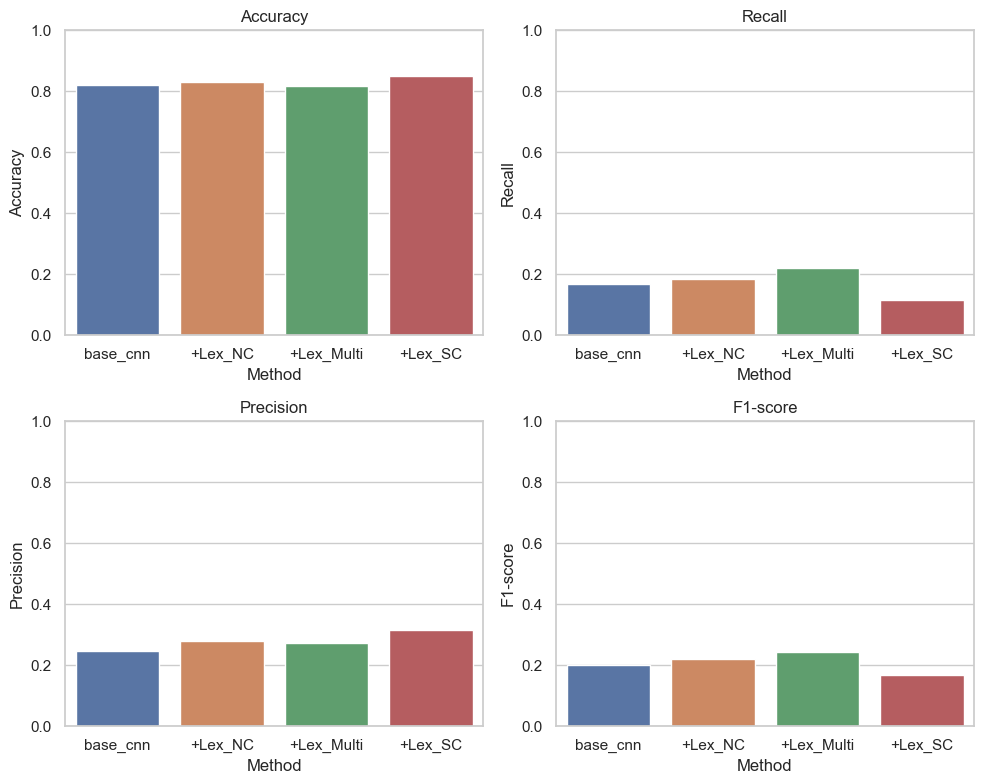

In [51]:
# method_name = ['base_line_CNN','Lex_NC_CNN','Lex_Multi_CNN','Lex_SC_CNN']
# method_value = [[acc_base,recall_base,preisi_base,f1_base],[acc_naive,recall_naive,preisi_naive,f1_naive],[acc_multi,recall_multi,preisi_multi,f1_multi],
#     [acc_seperated,recall_seperated,preisi_seperated,f1_seperated]]
method_name = ['Accuracy','Recall','Precision','F1-score','Method','num']
method_value = [[acc_base,acc_naive,acc_multi,acc_seperated],[recall_base,recall_naive,recall_multi,recall_seperated],[preisi_base,preisi_naive,preisi_multi,preisi_seperated],
    [f1_base,f1_naive,f1_multi,f1_seperated],['base_cnn','+Lex_NC','+Lex_Multi','+Lex_SC'],[1,2,3,4]]

method_result= dict(zip(method_name,method_value))
method_result= pd.DataFrame(method_result)

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot a histogram for each metric
sns.barplot(ax=axes[0, 0], data=method_result, y="Accuracy", x="Method")
sns.barplot(ax=axes[0, 1], data=method_result, y="Recall", x="Method")
sns.barplot(ax=axes[1, 0], data=method_result, y="Precision", x="Method")
sns.barplot(ax=axes[1, 1], data=method_result, y="F1-score", x="Method")

# Set the title for each plot
axes[0, 0].set_title("Accuracy")
axes[0, 0].set_ylim(0,1)
axes[0, 1].set_title("Recall")
axes[0, 1].set_ylim(0,1)
axes[1, 0].set_title("Precision")
axes[1, 0].set_ylim(0,1)
axes[1, 1].set_title("F1-score")
axes[1, 1].set_ylim(0,1)

# Adjust the spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()
# # plot histogram for each metric
# for metric in method_result.columns:
#     plt.hist(method_result[metric], alpha=0.5, label=metric)

# plt.legend(loc='upper right')
# plt.show()

In [52]:
def make_plot_hist(m1,m2,m3,m4,train, validation, title):
    graph = plt.subplot(2,2,1)
    graph = plt.plot(m1.history[train],label='train')
    graph = plt.plot(m1.history[validation],label='val')
    graph = plt.subplot(2,2,2)
    graph = plt.plot(m2.history[train],label='train')
    graph = plt.plot(m2.history[validation],label='val')
    graph = plt.subplot(2,2,3)
    graph = plt.plot(m3.history[train],label='train')
    graph = plt.plot(m3.history[validation],label='val')
    graph = plt.subplot(2,2,4)
    graph = plt.plot(m4.history[train],label='train')
    graph = plt.plot(m4.history[validation],label='val')
    plt.legend()
    graph = plt.show()
    return graph

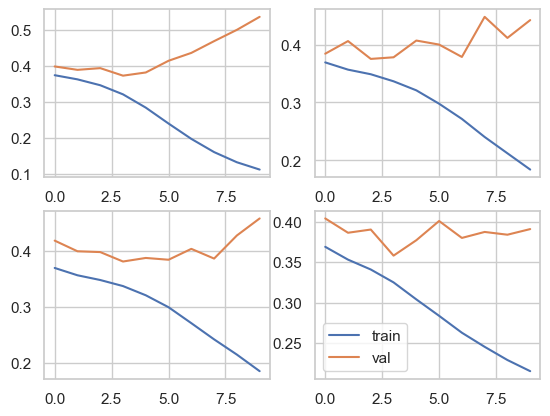

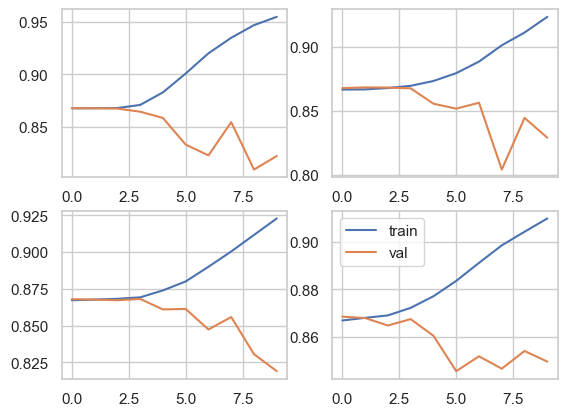

In [53]:
make_plot_hist(history_base,history_naive,history_multi,history_separated,'loss','val_loss','Perubahan loss pada tiap epochs')
make_plot_hist(history_base,history_naive,history_multi,history_separated,'accuracy','val_accuracy','Perubahan akurasi pada tiap epochs')

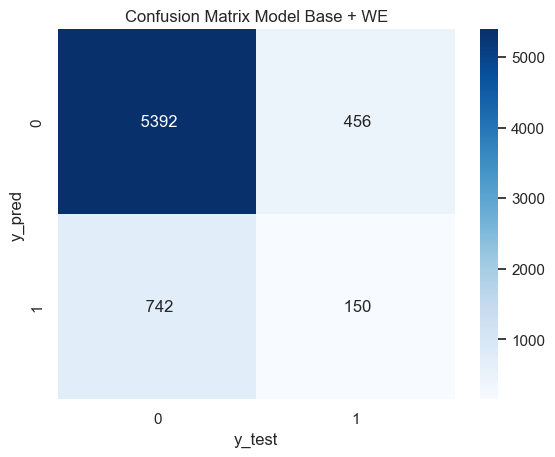

In [54]:
def out_cm(cm,title):
    ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
    ax.set_title(title)
    ax.set_xlabel('y_test')
    ax.set_ylabel('y_pred')

out_cm(cm1,'Confusion Matrix Model Base + WE')

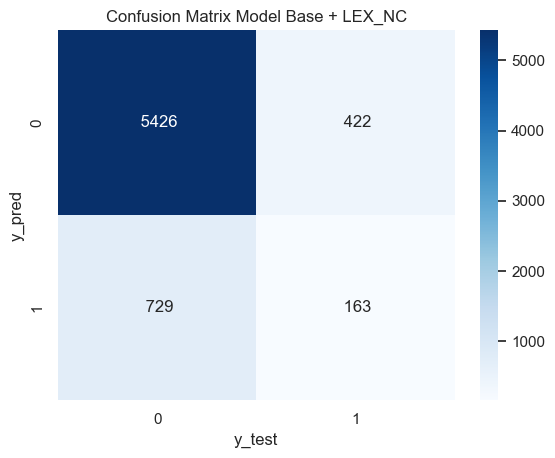

In [55]:
out_cm(cm2,'Confusion Matrix Model Base + LEX_NC')

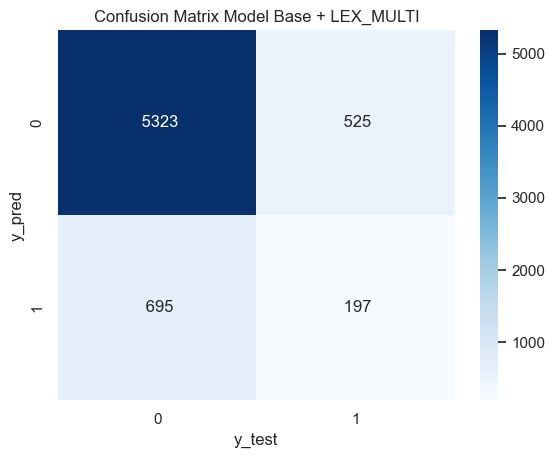

In [56]:
out_cm(cm3,'Confusion Matrix Model Base + LEX_MULTI')

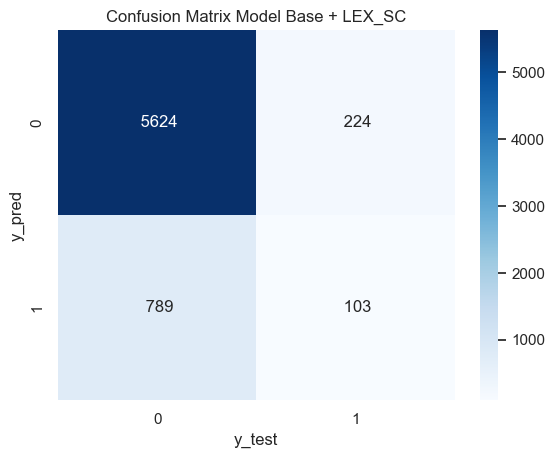

In [57]:
out_cm(cm4,'Confusion Matrix Model Base + LEX_SC')

In [58]:
print(classification_report(y_testnp,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      5848
           1       0.31      0.12      0.17       892

    accuracy                           0.85      6740
   macro avg       0.60      0.54      0.54      6740
weighted avg       0.80      0.85      0.82      6740

